In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
housing_data = pd.read_csv('train.csv')

In [3]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_data.shape

(1460, 81)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
##Checking the dataset for the amount of nulls columns present

In [7]:
round(housing_data.isnull().sum()/len(housing_data.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

In [8]:
##From the above drop the following columns which has more than 10% values as null

In [9]:
housing_data = housing_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','MoSold'],axis='columns')

In [10]:
##Now compute the age of the house from the date it was built instead of taking the year it was built and new age.

In [11]:
housing_data['YrBuilt_Old'] = housing_data.YearBuilt.max()-housing_data.YearBuilt
housing_data['YrRemodAdd_Old'] = housing_data.YearRemodAdd.max()-housing_data.YearRemodAdd
housing_data['GarageYrBlt_Old'] = housing_data.GarageYrBlt.max()-housing_data.GarageYrBlt
housing_data['YrSold_Old'] = housing_data.YrSold.max()-housing_data.YrSold
housing_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YrBuilt_Old','YrRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YrBuilt_Old,YrRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
611,1978,1978,1978.0,2007,32,32,32.0,3
472,2005,2005,2005.0,2008,5,5,5.0,2
295,1984,1984,1984.0,2006,26,26,26.0,4
74,1915,1950,1915.0,2010,95,60,95.0,0
578,2007,2007,2007.0,2008,3,3,3.0,2
113,1953,1953,1953.0,2007,57,57,57.0,3
276,2003,2003,2003.0,2010,7,7,7.0,0
11,2005,2006,2005.0,2006,5,4,5.0,4
745,1976,1996,1994.0,2008,34,14,16.0,2
61,1920,1996,1935.0,2007,90,14,75.0,3


In [12]:
##Drop the actual columns

In [13]:
housing_data = housing_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [14]:
###Imputing missing value

In [15]:
housing_data.MasVnrType.fillna('None',inplace=True)
housing_data.GarageQual.fillna('TA',inplace=True)
housing_data.GarageCond.fillna('TA',inplace=True)
housing_data.BsmtQual.fillna('TA',inplace=True)
housing_data.BsmtCond.fillna('TA',inplace=True)
housing_data.BsmtExposure.fillna('No',inplace=True)
housing_data.BsmtFinType1.fillna('Unf',inplace=True)
housing_data.BsmtFinType2.fillna('Unf',inplace=True)
housing_data.GarageFinish.fillna('Unf',inplace=True)
housing_data.GarageType.fillna('Attchd',inplace=True)
housing_data.GarageYrBlt_Old.fillna(-1,inplace=True)
housing_data.MasVnrArea.fillna(housing_data.MasVnrArea.mean(),inplace=True)

In [16]:
housing_data = housing_data.drop(['Street','Utilities','Id'],axis='columns')

In [17]:
##Let us plot some graphs for EDA

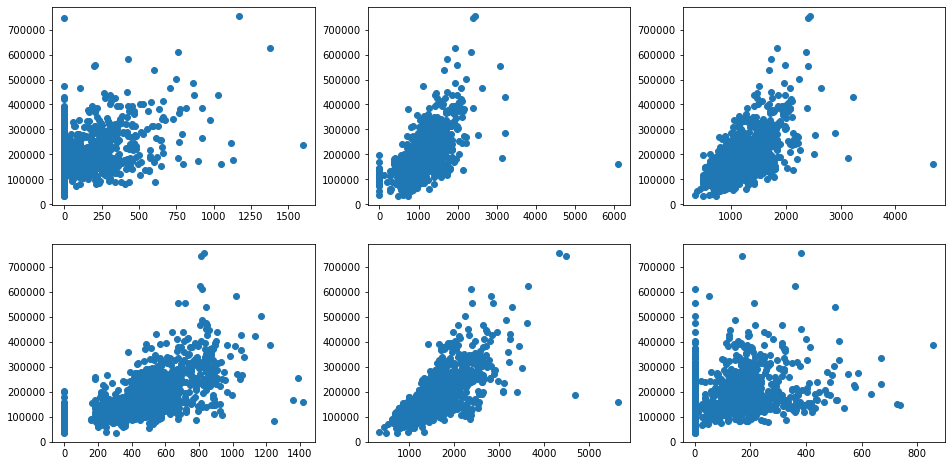

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing_data.MasVnrArea,housing_data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing_data.TotalBsmtSF,housing_data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing_data['1stFlrSF'],housing_data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing_data['GarageArea'],housing_data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing_data['GrLivArea'],housing_data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing_data['WoodDeckSF'],housing_data.SalePrice)

In [19]:
## Plotting heatmap to check the corellation between given varables

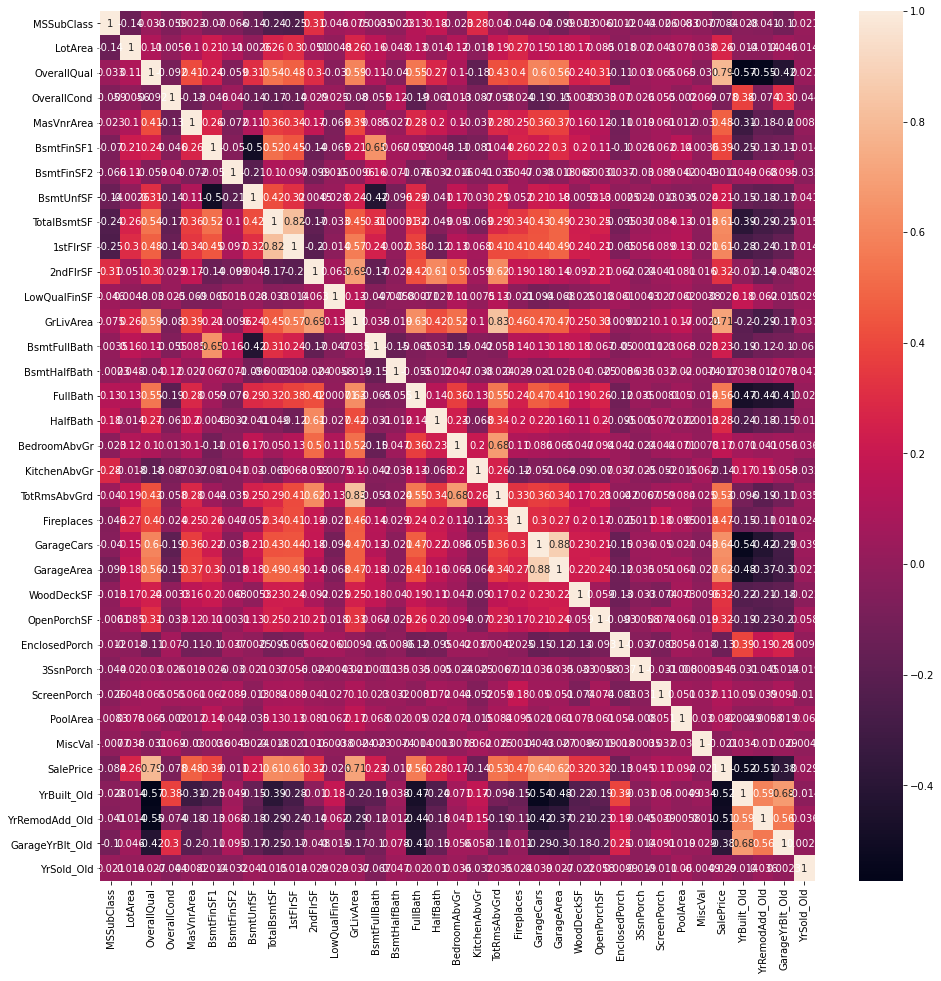

In [20]:
plt.figure(figsize=(16,16))
sns.heatmap(housing_data[list(housing_data.dtypes[housing_data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [21]:
##drop outliers

In [22]:
num_column = list(housing_data.dtypes[housing_data.dtypes !='object'].index)
num_column = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_column:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_data = drop_outliers(housing_data)

In [23]:
##Modify ordinal columns

In [24]:

housing_data['CentralAir'] = housing_data.CentralAir.map({'N':0,'Y':1})
housing_data['KitchenQual'] = housing_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['GarageFinish'] = housing_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing_data['GarageQual'] = housing_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['GarageCond'] = housing_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterCond'] = housing_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['LotShape'] = housing_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_data['LandSlope'] = housing_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing_data['ExterQual'] = housing_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['BsmtQual'] = housing_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtCond'] = housing_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtExposure'] = housing_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_data['BsmtFinType1'] = housing_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtFinType2'] = housing_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['HeatingQC'] = housing_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})


In [25]:
#### Creating and joining dummy column with the actual dataset

In [26]:
dummy_col = pd.get_dummies(housing_data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

housing_data = pd.concat([housing_data,dummy_col],axis='columns')

housing_data = housing_data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [27]:
#Making train and test dataset for validation purpose

In [28]:
df_train,df_test = train_test_split(housing_data,train_size=0.7,test_size=0.3,random_state=42)

In [29]:
##Scaling the dependent variables

In [30]:
num_column = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_column] = scaler.fit_transform(df_train[num_column])
df_test[num_column] = scaler.transform(df_test[num_column])

In [31]:
##Spliting the dependent and independent variable

In [32]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [33]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [34]:
###Using RFE to select best possible independent variables.

In [35]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [36]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [37]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [38]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [39]:
###Lets use the Lasso regression model

In [40]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8891632188900368
0.8522445211456127


In [41]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.196),
 ('LotArea', 0.235),
 ('LotShape', 0.136),
 ('LandSlope', 0.192),
 ('OverallQual', 0.165),
 ('OverallCond', 0.042),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.073),
 ('ExterCond', 0.019),
 ('BsmtQual', 0.0),
 ('BsmtCond', -0.019),
 ('BsmtExposure', 0.316),
 ('BsmtFinType1', 0.164),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.173),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.036),
 ('HeatingQC', 0.178),
 ('CentralAir', -0.05),
 ('1stFlrSF', -0.041),
 ('2ndFlrSF', -0.175),
 ('LowQualFinSF', -0.279),
 ('GrLivArea', -0.131),
 ('BsmtFullBath', -0.112),
 ('BsmtHalfBath', -0.222),
 ('FullBath', -0.286),
 ('HalfBath', -0.247),
 ('BedroomAbvGr', -0.201),
 ('KitchenAbvGr', -0.216),
 ('KitchenQual', -0.178),
 ('TotRmsAbvGrd', -0.218),
 ('Fireplaces', -0.038),
 ('GarageFinish', -0.093),
 ('GarageCars', -0.01),
 ('GarageArea', -0.106),
 ('GarageQual', -2.303),
 ('GarageCond', -0.301),
 ('WoodDeckSF', -0.219),
 ('OpenPorchSF', -0.153),
 ('EnclosedPorch', 0.0),

In [42]:
##Lets improve the model using Grid Search and alpha values

In [43]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [44]:
result_l = pd.DataFrame(model_cv.cv_results_)
result_l['param_alpha'] = result_l['param_alpha'].astype('float32')
result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.248693,0.075573,0.021460,0.006440,0.001,{'alpha': 0.001},0.834185,0.896985,0.799842,0.862442,...,0.896013,0.890792,0.888467,0.887898,0.886718,0.903521,0.889801,0.886687,0.890990,0.005033
1,0.082731,0.015430,0.030435,0.013921,0.010,{'alpha': 0.01},0.808658,0.854057,0.838821,0.820220,...,0.834532,0.837403,0.834674,0.833581,0.832661,0.871017,0.835566,0.830865,0.838551,0.011064
2,0.071550,0.024889,0.038757,0.018812,0.100,{'alpha': 0.1},0.741693,0.805251,0.769777,0.741077,...,0.780282,0.789278,0.783349,0.783012,0.776474,0.817421,0.783703,0.778584,0.786223,0.011038
3,0.070648,0.034440,0.037103,0.018021,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.035299,0.011031,0.019203,0.009608,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


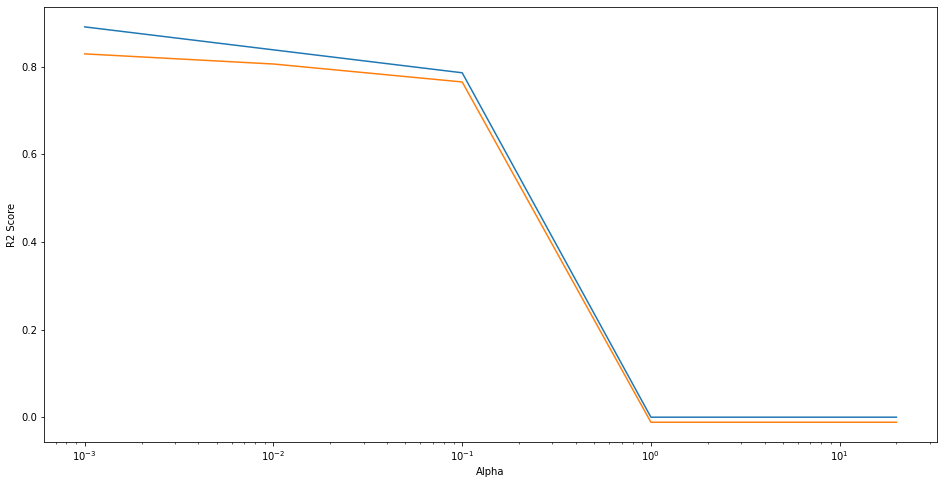

In [45]:
plt.figure(figsize=(16,8))
plt.plot(result_l['param_alpha'],result_l['mean_train_score'])
plt.plot(result_l['param_alpha'],result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [46]:
model_cv.best_params_

{'alpha': 0.001}

In [47]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8891632188900368
0.8522445211456127


In [48]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [49]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
43,PoolArea,1.407644
67,Neighborhood_Gilbert,0.396612
11,BsmtExposure,0.315611
1,LotArea,0.234560
3,LandSlope,0.192194
18,HeatingQC,0.178060
15,BsmtFinSF2,0.173002
4,OverallQual,0.165421
12,BsmtFinType1,0.164369
44,MiscVal,0.160426


In [50]:
###Now lets use the ridge regression

In [51]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8986482310301945
0.8365846289850019


In [52]:
##Now improve our model using GridSearch 

In [53]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
result_r = pd.DataFrame(model_cv.cv_results_)
result_r['param_alpha'] = result_r['param_alpha'].astype('float32')
result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.276772,0.211737,0.026694,0.013066,0.001,{'alpha': 0.001},0.843175,0.902968,0.762817,0.874430,...,0.906444,0.900625,0.898461,0.897788,0.897317,0.912400,0.898972,0.895946,0.900637,0.004848
1,0.288711,0.096488,0.028028,0.009333,0.010,{'alpha': 0.01},0.843478,0.902927,0.766090,0.874379,...,0.906440,0.900624,0.898460,0.897787,0.897316,0.912400,0.898971,0.895944,0.900636,0.004848
2,0.057109,0.027189,0.017249,0.004446,0.100,{'alpha': 0.1},0.845510,0.902477,0.793554,0.873884,...,0.906089,0.900533,0.898359,0.897691,0.897208,0.912349,0.898871,0.895850,0.900516,0.004829
3,0.049689,0.032928,0.018452,0.004912,0.200,{'alpha': 0.2},0.846525,0.901926,0.815628,0.873367,...,0.905275,0.900302,0.898108,0.897451,0.896943,0.912224,0.898620,0.895610,0.900225,0.004797
4,0.083283,0.087030,0.025872,0.020056,0.500,{'alpha': 0.5},0.846860,0.900111,0.852802,0.871978,...,0.901920,0.899161,0.896884,0.896277,0.895677,0.911642,0.897393,0.894430,0.898872,0.004777


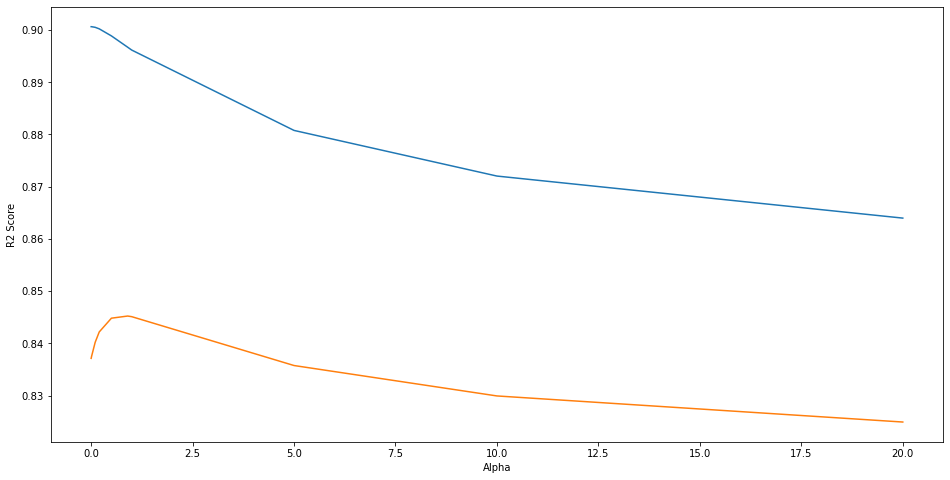

In [55]:
plt.figure(figsize=(16,8))
plt.plot(result_r['param_alpha'],result_r['mean_train_score'])
plt.plot(result_r['param_alpha'],result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [56]:
model_cv.best_params_

{'alpha': 0.9}

In [57]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8955157766099435
0.8485953462714189


In [58]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [59]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
43,PoolArea,1.441013
67,Neighborhood_Gilbert,0.528522
68,Neighborhood_IDOTRR,0.304001
41,3SsnPorch,0.296113
54,LandContour_Low,0.248432
15,BsmtFinSF2,0.237229
13,BsmtFinSF1,0.235378
53,LandContour_HLS,0.231954
1,LotArea,0.215888
18,HeatingQC,0.198574


In [60]:
##Final Model

In [61]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8891632188900368
0.8522445211456127


In [62]:
#Features are best explaining the DataSet

In [63]:
#1) PoolArea
#2) Neighborhood_Gilbert
#3) BsmtExposure
#4) LotArea
#5) LandSlope

In [64]:
#Best alpha value for Lasso : {'alpha': 0.001}
#Best alpha value for Ridge : {'alpha': 0.9}